In [ ]:
!pip install scikit-learn
!pip install tensorflow


In [25]:
import pandas as pd 
import json
import numpy as np
from sklearn.metrics import r2_score

In [39]:
data

[{'2015': [{'1': [{'Details': 'Broncos vs Rabbitohs',
      'Date': 'Thursday 5th March',
      'Home': 'Broncos',
      'Home_Score': '6',
      'Away': 'Rabbitohs',
      'Away_Score': '36',
      'Venue': 'Suncorp Stadium, Brisbane'},
     {'Details': 'Eels vs Sea Eagles',
      'Date': 'Friday 6th March',
      'Home': 'Eels',
      'Home_Score': '42',
      'Away': 'Sea Eagles',
      'Away_Score': '12',
      'Venue': 'Bankwest Stadium, Sydney'},
     {'Details': 'Knights vs Warriors',
      'Date': 'Saturday 7th March',
      'Home': 'Knights',
      'Home_Score': '24',
      'Away': 'Warriors',
      'Away_Score': '14',
      'Venue': 'McDonald Jones Stadium, Newcastle'},
     {'Details': 'Titans vs Wests Tigers',
      'Date': 'Saturday 7th March',
      'Home': 'Titans',
      'Home_Score': '18',
      'Away': 'Wests Tigers',
      'Away_Score': '19',
      'Venue': 'Cbus Super Stadium, Gold Coast'},
     {'Details': 'Cowboys vs Roosters',
      'Date': 'Saturday 7th March',


In [64]:
years_arr

{2015: [{'1': [{'Details': 'Broncos vs Rabbitohs',
     'Date': 'Thursday 5th March',
     'Home': 'Broncos',
     'Home_Score': '6',
     'Away': 'Rabbitohs',
     'Away_Score': '36',
     'Venue': 'Suncorp Stadium, Brisbane'},
    {'Details': 'Eels vs Sea Eagles',
     'Date': 'Friday 6th March',
     'Home': 'Eels',
     'Home_Score': '42',
     'Away': 'Sea Eagles',
     'Away_Score': '12',
     'Venue': 'Bankwest Stadium, Sydney'},
    {'Details': 'Knights vs Warriors',
     'Date': 'Saturday 7th March',
     'Home': 'Knights',
     'Home_Score': '24',
     'Away': 'Warriors',
     'Away_Score': '14',
     'Venue': 'McDonald Jones Stadium, Newcastle'},
    {'Details': 'Titans vs Wests Tigers',
     'Date': 'Saturday 7th March',
     'Home': 'Titans',
     'Home_Score': '18',
     'Away': 'Wests Tigers',
     'Away_Score': '19',
     'Venue': 'Cbus Super Stadium, Gold Coast'},
    {'Details': 'Cowboys vs Roosters',
     'Date': 'Saturday 7th March',
     'Home': 'Cowboys',
     'Ho

In [231]:
teams = ["Broncos", "Roosters", "Wests Tigers", "Rabbitohs", "Storm", "Eels", "Raiders", "Knights", "Dragons", "Sea Eagles", "Panthers", "Sharks", "Bulldogs", "Dolphins", "Titans", "Cowboys", "Warriors"]
variables =["Year", "Win", "Defense", "Attack", "Margin", "Home", "Versus",  "Round"]
years =  [2015, 2016, 2017, 2018, 2022, 2023]

In [232]:
years_arr = {}
with open('nrl_data_multi_years.json', 'r') as file:
    data = json.load(file)
    data = data['NRL']
    for year in years:
        years_arr[year] = data[years.index(year)][str(year)]
    

In [246]:
df = pd.DataFrame(columns=[f"{team} {variable}" for team in teams for variable in variables])


In [247]:
all_store = []
for year in years:
    for round in range(0, 21):
        round_data = years_arr[year][round][str(round+1)]
        
        # Create an empty feature array 
        round_store = np.zeros([len(teams)*len(variables)], dtype=int)
        round_teams = []
        for game in round_data:
            h_team = game['Home']
            h_score = int(game['Home_Score'])
            a_team = game['Away']
            a_score = int(game['Away_Score'])
            
            # win or lose
            h_team_win = h_score >= a_score
            a_team_win = a_score >= h_score
            
            # home
            h_home = 1
            a_home = 0
            
            # versus
            h_versus = teams.index(a_team)
            a_versus = teams.index(h_team)
            
            # Defense (points let in)
            h_team_defense = a_score
            a_team_defense = h_score  
            
            # Attack Points scored
            h_team_attack = h_score 
            a_team_attack = a_score   
            
            # Margin
            h_team_margin =  h_score-a_score   
            a_team_margin =  a_score-h_score        
            
            # Keep track of which teams played to work out which teams had a bye 
            round_teams.append(h_team)
            round_teams.append(a_team)
            
            
            # Find the index of the team in the overaching array 
            a_team_idx = teams.index(a_team)
            h_team_idx = teams.index(h_team)
            
            # Feature map index
            a_team_idx_fm = a_team_idx*len(variables)
            h_team_idx_fm = h_team_idx*len(variables)
            
            # input(round_store)
            # input(a_team_idx_fm)
            # populate the data
            round_store[a_team_idx_fm] = year
            round_store[a_team_idx_fm+1] = a_team_win
            round_store[a_team_idx_fm+2] = a_team_defense
            round_store[a_team_idx_fm+3] = a_team_attack
            round_store[a_team_idx_fm+4] = a_team_margin
            round_store[a_team_idx_fm+5] = a_home
            round_store[a_team_idx_fm+6] = a_versus
            round_store[a_team_idx_fm+7] = round+1
            round_store[h_team_idx_fm] = year
            round_store[h_team_idx_fm+1] = h_team_win
            round_store[h_team_idx_fm+2] = h_team_defense
            round_store[h_team_idx_fm+3] = h_team_attack
            round_store[h_team_idx_fm+4] = h_team_margin
            round_store[h_team_idx_fm+5] = h_home
            round_store[h_team_idx_fm+6] = h_versus
            round_store[h_team_idx_fm+7] = round+1
            
        # input(round_teams)
        bye_teams = list(set(teams) - set(round_teams))
        for bye_team in bye_teams:
            b_team_idx = teams.index(bye_team)
            b_team_idx_fm = b_team_idx*len(variables)
            round_store[b_team_idx_fm] = year
            round_store[b_team_idx_fm+1] = -1
            round_store[b_team_idx_fm+2] = -1
            round_store[b_team_idx_fm+3] = -1
            round_store[b_team_idx_fm+4] = 0
            round_store[b_team_idx_fm+5] = -1
            round_store[b_team_idx_fm+6] = -1
            round_store[b_team_idx_fm+7] = round+1
            
        all_store.append(round_store)
        # Create an array with the same size as the DataFrame

        # Add the new row to the DataFrame using loc
        df.loc[len(df)] = round_store
df

,Broncos Year,Broncos Win,Broncos Defense,Broncos Attack,Broncos Margin,Broncos Home,Broncos Versus,Broncos Round,Roosters Year,Roosters Win,...,Cowboys Versus,Cowboys Round,Warriors Year,Warriors Win,Warriors Defense,Warriors Attack,Warriors Margin,Warriors Home,Warriors Versus,Warriors Round
0,2015,0,36,6,-30,1,3,1,2015,1,...,1,1,2015,0,24,14,-10,0,7,1
1,2015,1,2,10,8,0,11,2,2015,0,...,7,2,2015,1,6,18,12,0,6,2
2,2015,1,22,44,22,1,15,3,2015,1,...,0,3,2015,1,16,29,13,1,5,3
3,2015,1,16,24,8,0,16,4,2015,1,...,4,4,2015,0,24,16,-8,1,0,4
4,2015,1,16,26,10,0,14,5,2015,0,...,10,5,2015,0,30,14,-16,0,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2023,0,18,12,-6,1,14,17,2023,0,...,3,17,2023,1,18,48,30,0,8,17
122,2023,1,16,24,8,1,13,18,2023,0,...,2,18,2023,0,28,6,-22,1,3,18
123,2023,-1,-1,-1,0,-1,-1,19,2023,-1,...,-1,19,2023,1,10,46,36,0,5,19
124,2023,1,24,44,20,0,12,20,2023,0,...,9,20,2023,1,12,44,32,1,11,20


In [390]:
GAME_HISTORY = 3

def get_game_history(year, round_, team):
    # Filter by year
    filtered_df = df[df[team + " Year"] == year]
    # # Remove all byes
    filtered_df = filtered_df.iloc[round_-GAME_HISTORY-1:round_-1] 
    
    byes = len(filtered_df[filtered_df[team + " Win"] == -1])
    
    filtered_df = filtered_df[filtered_df[team + " Win"] != -1]
    
    
    win = filtered_df[team+ " Win"].mean()
    defense = filtered_df[team+ " Defense"].median()
    attack = filtered_df[team+ " Attack"].median()
    margin = filtered_df[team+ " Margin"].median()
    
    defense_mean = filtered_df[team+ " Defense"].mean()
    attack_mean = filtered_df[team+ " Attack"].mean()
    margin_mean = filtered_df[team+ " Margin"].mean()
    
    
    games_at_home = filtered_df[team+ " Home"].mean()
    
    return win, defense, attack, margin, byes, games_at_home, defense_mean, attack_mean, margin_mean
    

In [391]:
X = []
y = [] 
# Input: Team, Other Team Team Stats, Other Team Stats
# Output: Team, win/lose, other team, win/lose


for team in teams:
    # Skip the game history as we dont want to break the calibration
    versed_teams = df[team+ " Versus"]
    wins = df[team+ " Win"]
    rounds = df[team+ " Round"]
    years = df[team+ " Year"]
    
    
    c_team_idx = teams.index(team)
    
    
    
    for versed_team, win, round, year in zip(versed_teams, wins, rounds, years):
        # Skip all byes  or games with no momentum
        if win == -1 or round <= GAME_HISTORY:
            continue
        
        
        
        # dosent take into account for ties, look into this harder later 
        if win == 1:
            v_win_ = 0
        else:
            v_win_ = 1
        
        # Current team, vsed team, who wins, current_team_stats, vsed_team_stats
        X.append([c_team_idx, versed_team, *get_game_history(year, round, team), *get_game_history(year, round, teams[versed_team])])
        y.append([c_team_idx, versed_team, win, v_win_])


In [398]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.metrics import r2_score
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create a Random Forest Regressor model
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.3, shuffle=True)


# Convert lists to NumPy arrays
X_train, X_val, y_train, y_val = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


# Create a neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))  # Dropout layer to reduce overfitting
model.add(Dense(32, activation='relu'))
model.add(Dense(4))

# Define a learning rate schedule
initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=1000, decay_rate=0.96)


# Compile the model
model.compile(optimizer=Adam(learning_rate=lr_schedule), loss='huber_loss')

# Lists to store the R-squared scores during training
train_r2_scores = []
val_r2_scores = []
train_losses = []  

# Training loop to track R-squared scores on both training and validation sets
num_epochs = 1000  # You can adjust the number of epochs as needed

for epoch in range(num_epochs):
    # Train the model on the training data
    history = model.fit(X_train_scaled, y_train, batch_size=32, epochs=1, verbose=0)
    
    # Calculate R-squared scores on the training and validation sets
    y_train_pred = model.predict(X_train_scaled)
    y_val_pred = model.predict(X_val_scaled)
    
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    
    # Store the R-squared scores for each epoch
    train_r2_scores.append(train_r2)
    val_r2_scores.append(val_r2)
    
    train_losses.append(history.history['loss'][0])
    

# Final R-squared scores
final_train_r2 = train_r2_scores[-1]
final_val_r2 = val_r2_scores[-1]

print(f"Final Training R-squared: {final_train_r2:.4f}")
print(f"Final Validation R-squared: {final_val_r2:.4f}")

15/15 [==============================] - 0s 1ms/step
Final Training R-squared: 0.6218
Final Validation R-squared: 0.4829


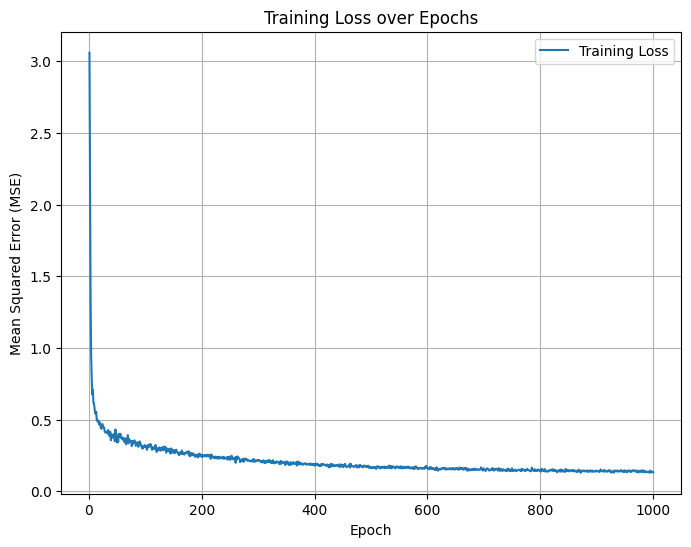

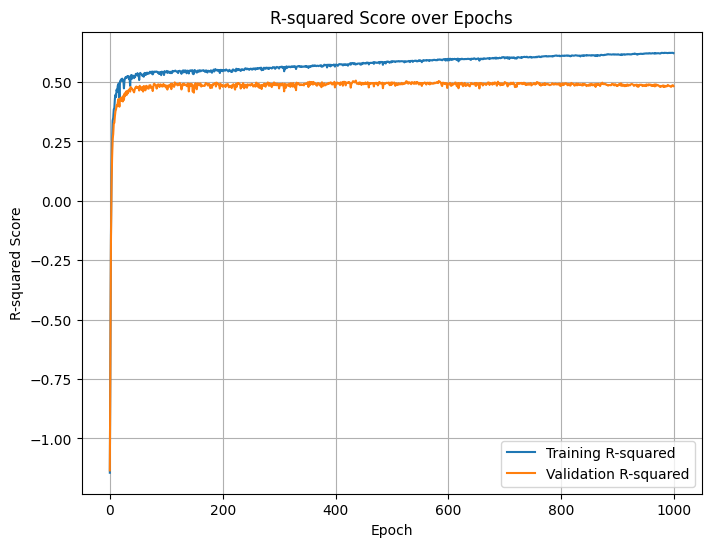

15/15 [==============================] - 0s 1ms/step


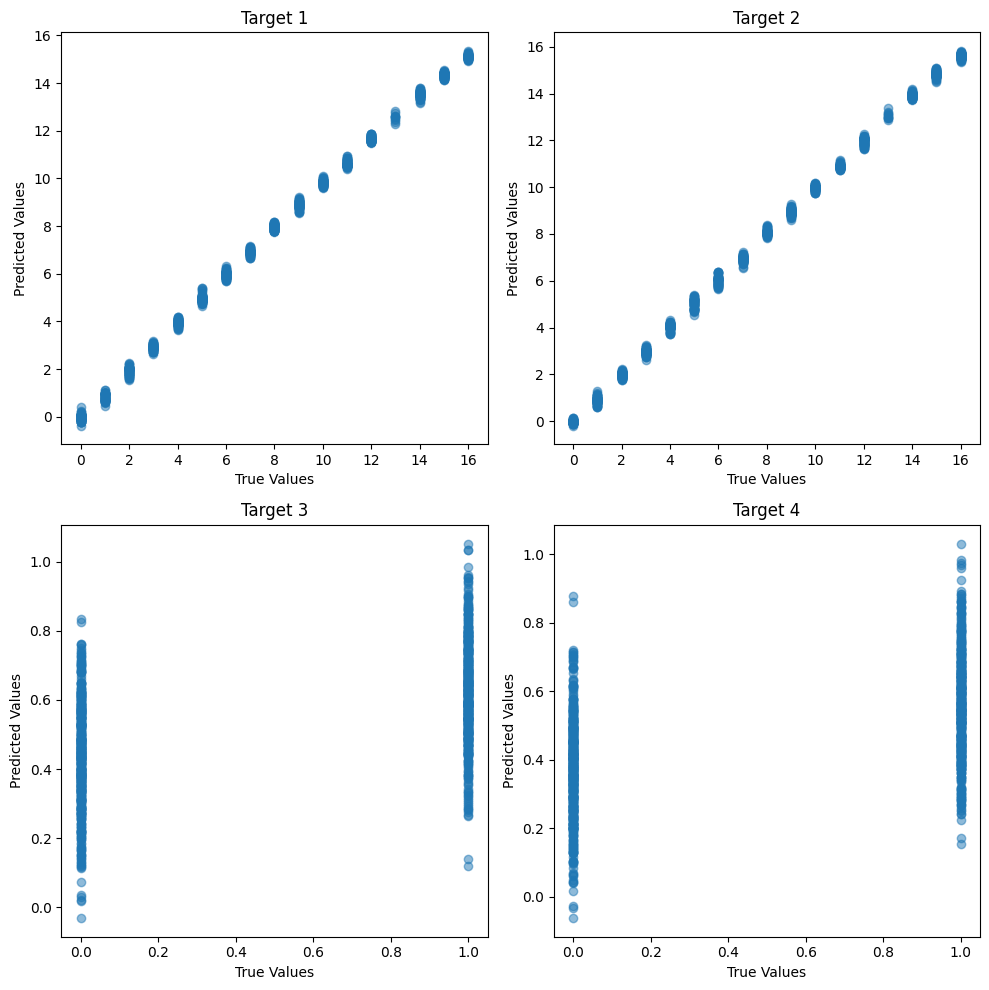

In [399]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the Loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plotting R-squared scores
plt.figure(figsize=(8, 6))
plt.plot(train_r2_scores, label='Training R-squared')
plt.plot(val_r2_scores, label='Validation R-squared')
plt.xlabel('Epoch')
plt.ylabel('R-squared Score')
plt.title('R-squared Score over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot of true vs. predicted values
y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(y_train[:, 0], y_train_pred[:, 0], alpha=0.5)
axs[0, 0].set_title('Target 1')
axs[0, 1].scatter(y_train[:, 1], y_train_pred[:, 1], alpha=0.5)
axs[0, 1].set_title('Target 2')
axs[1, 0].scatter(y_train[:, 2], y_train_pred[:, 2], alpha=0.5)
axs[1, 0].set_title('Target 3')
axs[1, 1].scatter(y_train[:, 3], y_train_pred[:, 3], alpha=0.5)
axs[1, 1].set_title('Target 4')

for ax in axs.flat:
    ax.set(xlabel='True Values', ylabel='Predicted Values')

plt.tight_layout()
plt.show()

In [397]:
# teams = ["Broncos", "Roosters", "Wests Tigers", "Rabbitohs", "Storm", "Eels", "Raiders", "Knights", "Dragons", "Sea Eagles", "Panthers", "Sharks", "Bulldogs", "Dolphins", "Titans", "Cowboys", "Warriors"]


wkd_matches = [["Broncos", "Roosters"], ["Wests Tigers", "Rabbitohs"], ["Storm", "Eels"], ["Raiders", "Knights"], ["Dragons", "Sea Eagles"], ["Panthers", "Sharks"], ["Bulldogs", "Dolphins"], ["Titans", "Cowboys"]]

# wkd_matches = [["Dragons", "Wests Tigers"], ["Warriors", "Raiders"], ["Rabbitohs", "Broncos"], ["Titans", "Roosters"], ["Knights", "Storm"], ["Cowboys", "Eels"], ["Panthers", "Bulldogs"], ["Sharks", "Sea Eagles"]]

for wkd_match in wkd_matches:

    team_1 = int(teams.index(wkd_match[0]))
    team_2 = int(teams.index(wkd_match[1]))

    pred_in = [team_1, team_2, c_win, c_defense, c_attack, c_margin, c_byes, c_home_games, v_win, v_defense, v_attack, v_margin, v_byes, v_home_games]
    pred_in_2 = [team_1, team_2,  *get_game_history(2023, 22, teams[int(team_1)]), *get_game_history(2023, 22, teams[int(team_2)])]

    predictions = model.predict([pred_in_2], verbose=0)
    predictions = predictions[0]
    if predictions[2] > predictions[3]:
        print(f"{teams[team_1]} wins\t\t {teams[team_1]}: {predictions[2]:.4f}\t{teams[team_2]}: {predictions[3]:.4f}")
    else:
        print(f"{teams[team_2]} wins\t\t {teams[team_1]}: {predictions[2]:.4f}\t{teams[team_2]}: {predictions[3]:.4f}")


Broncos wins		 Broncos: 1.3312	Roosters: 0.4296
Wests Tigers wins		 Wests Tigers: 0.4353	Rabbitohs: 0.2441
Eels wins		 Storm: 0.2935	Eels: 0.5996
Knights wins		 Raiders: 0.5279	Knights: 1.2599
Sea Eagles wins		 Dragons: 0.4853	Sea Eagles: 1.3970
Sharks wins		 Panthers: 0.8361	Sharks: 1.5437
Dolphins wins		 Bulldogs: 0.6413	Dolphins: 2.2921
Cowboys wins		 Titans: 0.8153	Cowboys: 2.6948
